# Code Execution


A [Planning and Control](https://arxiv.org/abs/2507.07257) strategy to execute code with an **engineer** agent.  


## Planning and Control


This is a common strategy that is at the basis of most *Deep Research/Coding* tools, like [Claude Code](https://www.anthropic.com/claude-code) or [ChatGPT Deep research](https://openai.com/index/introducing-deep-research/).  

The idea is simple and illustrated below. 

<img src="planning_and_control.png" alt="Planning and Control" width="400"/>


### Planning

The **main task** is broken down into sub-tasks by **planner agents**. The sequence of sub-tasks forms a **Plan**.

### Control

The Plan is executed step-by-step. 



## Example: Make A Plot


Here, the input to the system is a task... We want to make a plot. 

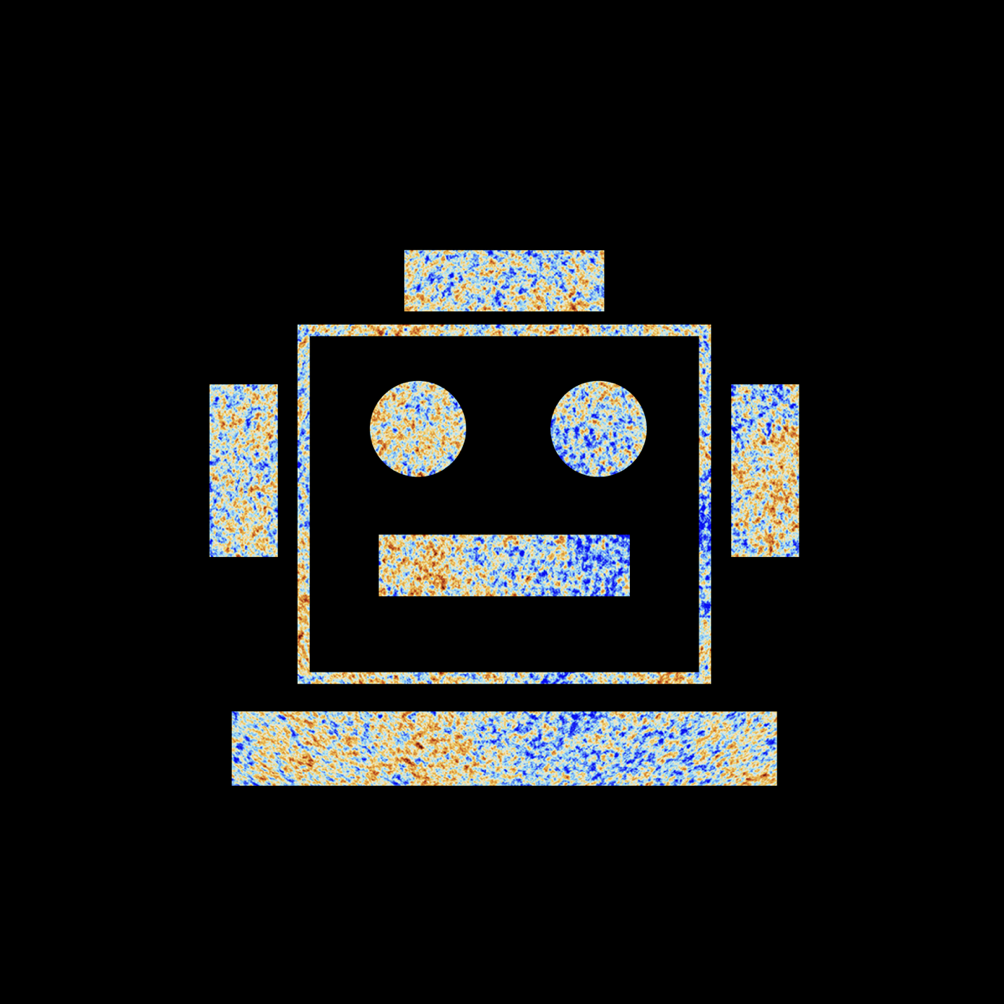


Multi-Agent Systems for Autonomous Discovery


Get the source code [here](https://github.com/CMBAgents/cmbagent/tree/main).

Built with [AG2](https://github.com/ag2ai/ag2).


In [1]:
import os
os.environ["CMBAGENT_DISABLE_DISPLAY"] = "false"
import cmbagent
root = "~/Desktop/"
work_dir = root+"cmbagent_dir"

In [2]:
task = r"""
Plot a 3D Möbius strip using matplotlib.
"""

### One-Shot 

In this first example we **bypass the planning stage and enter directly control** with our task. 


Plot a 3D Möbius strip using matplotlib.


--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,engineer,0.01167,1697,955,2652


**Code Explanation:**

The Python code generates and plots a 3D representation of a Möbius strip using `matplotlib`. First, it imports the necessary libraries: `numpy` for numerical operations, `matplotlib.pyplot` for plotting, and `os` and `time` for file path and timestamp generation.

The script defines the parametric equations for a Möbius strip. It creates a grid of points using `numpy.meshgrid` for the parameters `u` (angle) and `v` (width). These grid points are then used to calculate the corresponding 3D coordinates (x, y, z).

A 3D plot is initialized, and the `plot_surface` function is used to render the strip with a 'viridis' colormap. The plot is customized with a title and axis labels. To ensure a clean look, the axis panes' grid lines are turned off.

Finally, the generated plot is saved as a high-resolution PNG file in the `data/` directory. The filename includes the plot name, a plot number, and a timestamp to ensure uniqueness. A confirmation message is printed to the 

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00659,1616,1094,2710


**Code Explanation:**

The Python code generates and plots a 3D representation of a Möbius strip using matplotlib. First, it imports the necessary libraries: numpy for numerical operations, matplotlib.pyplot for plotting, and os and time for file path and timestamp generation.

The script defines the parametric equations for a Möbius strip. It creates a grid of points using numpy.meshgrid for the parameters u (angle) and v (width). These grid points are then used to calculate the corresponding 3D coordinates (x, y, z).

A 3D plot is initialized, and the plot_surface function is used to render the strip with a 'viridis' colormap. The plot is customized with a title and axis labels. To ensure a clean look, the axis panes' grid lines are turned off.

Finally, the generated plot is saved as a high-resolution PNG file in the data/ directory. The filename includes the plot name, a plot number, and a timestamp to ensure uniqueness. A confirmation message is printed to the console after the fi

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00148,1199,37,1236



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): In progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00493,2311,39,2350



--------------------------------------------------------------------------------


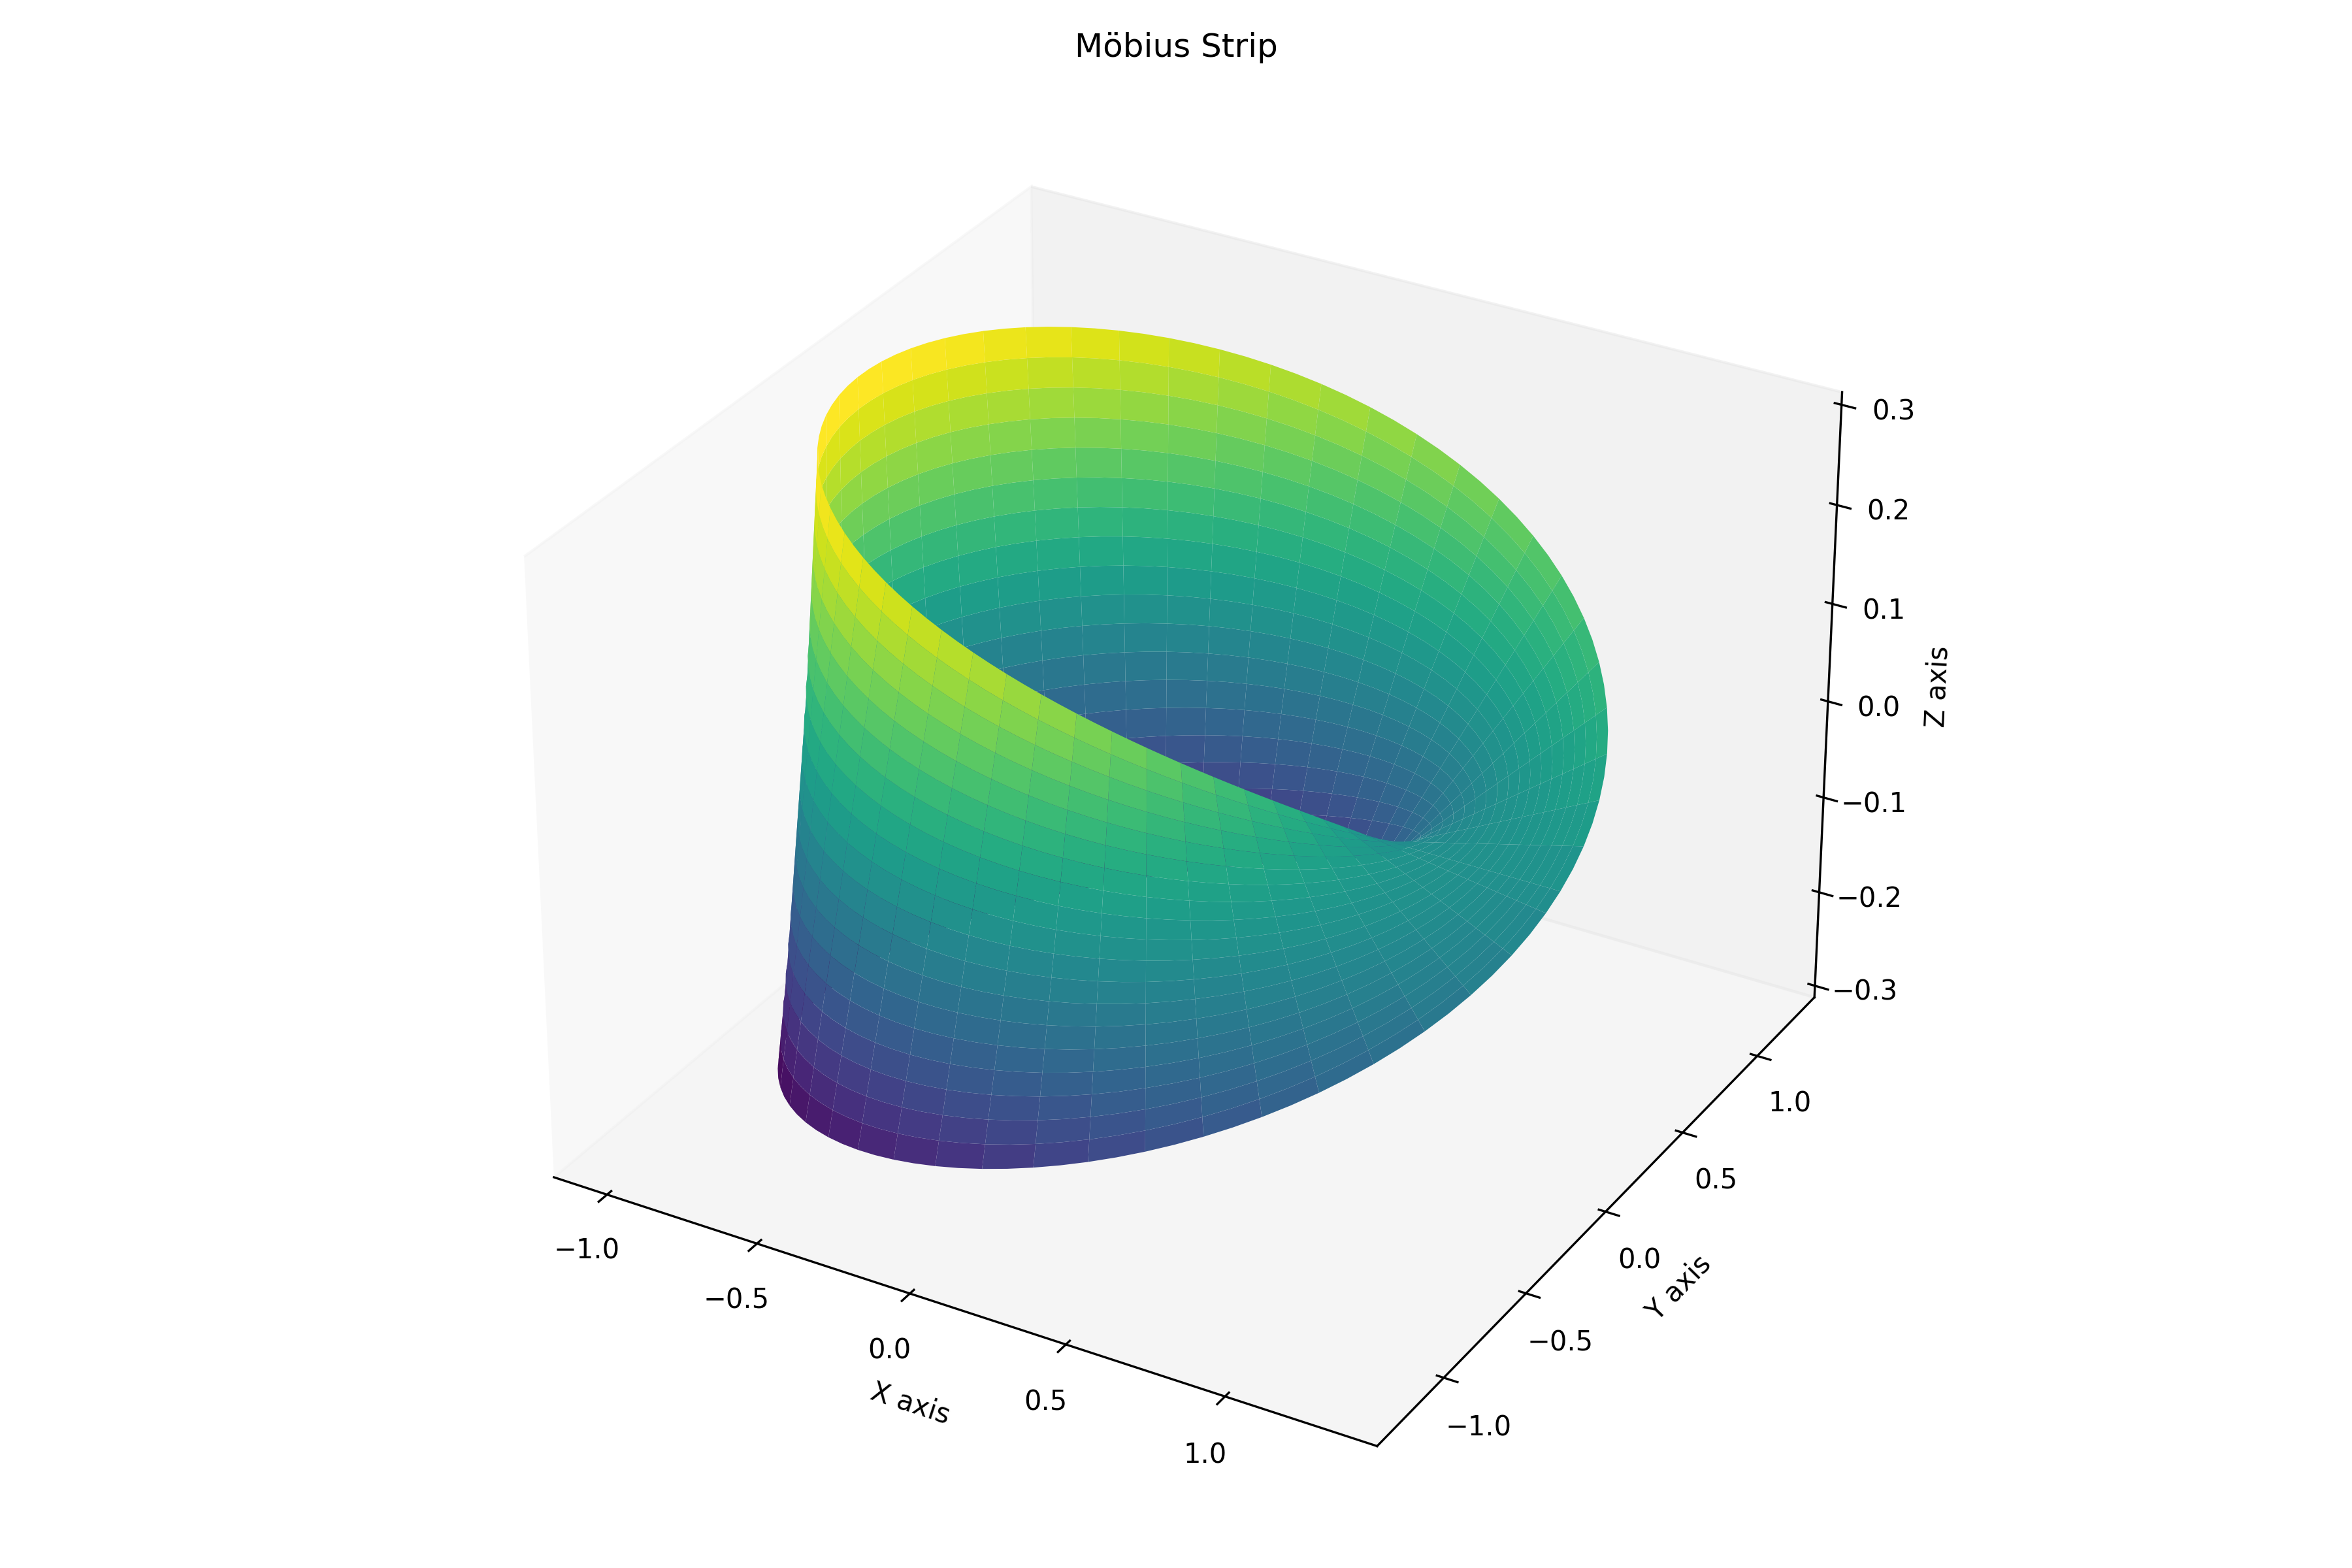


**Step number:** 1 out of 1.
 
**Sub-task:** solve the main task.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
solve the main task.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00369,1842,1,1843



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00148170 |          1199 |                37 |         1236 | o3-mini-2025-01-31 |
| engineer response formatter | $0.00659120 |          1616 |              1094 |         2710 | o3-mini-2025-01-31 |
| terminator                  | $0.00369200 |          1842 |                 1 |         1843 | gpt-4.1-2025-04-14 |
| control                     | $0.00493400 |          2311 |                39 |         2350 | gpt-4.1-2025-04-14 |
| engineer                    | $0.01167125 |          1697 |               955 |        

In [3]:
results = cmbagent.one_shot(task,
                   max_rounds=50,
                   agent='engineer',
                   # engineer_model='gpt-4.1-2025-04-14',
                   engineer_model='gemini-2.5-pro',
                   # engineer_model = 'claude-sonnet-4-20250514',
                   work_dir=work_dir,
                   clear_work_dir = True,
                  )


#### Post-Processing Traces

In [4]:
import os
from IPython.display import display, Markdown

def list_dir_tree(startpath, max_depth=5):
    output = ""
    startpath = os.path.expanduser(startpath)
    for root, dirs, files in os.walk(startpath):
        # Limit depth
        depth = root[len(startpath):].count(os.sep)
        if depth > max_depth:
            continue
        indent = "    " * depth
        output += f"{indent}- `{os.path.basename(root)}/`\n"
        for f in files:
            output += f"{indent}    - {f}\n"
    return output

tree_md = list_dir_tree(work_dir)
display(Markdown(f"**Tree view of** `{work_dir}`\n\n{tree_md}"))


**Tree view of** `~/Desktop/cmbagent_dir`

- `cmbagent_dir/`
    - `cost/`
        - cost_report_20250731_160643.json
    - `time/`
        - timing_report_20250731_160643.json
    - `codebase/`
        - mobius_strip_plot.py
    - `chats/`
        - nested_chat_output_engineer_step_1_attempt_1.json
        - chat_output_step_1.json
    - `data/`
        - mobius_strip_1_1753974398.png


### Planning and Control

Now we use planning and control with a two-step plan for the same task.


Plot a 3D Möbius strip using matplotlib.


--------------------------------------------------------------------------------
Setting agents for the session...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,plan_setter,0.00049,215,8,223



--------------------------------------------------------------------------------
Plan constraints have been logged.

--------------------------------------------------------------------------------

Calling planner...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner,0.00210,410,160,570


**Plan:**
   - Step 1:
         * sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
         * agent: engineer
         * bullet points:
            - Define the parametric equations for a Möbius strip.
            - Generate a meshgrid of parameters to represent the surface.
            - Compute the x, y, z coordinates for the Möbius strip.
   - Step 2: 
         * sub-task: Plot the 3D Möbius strip using matplotlib.
         * agent: engineer
         * bullet points:
            - Use matplotlib's 3D plotting capabilities to visualize the Möbius strip.
            - Set appropriate labels, titles, and viewing angles for clarity.
            - Display the plot.

--------------------------------------------------------------------------------
Formatting...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner_response_formatter,0.00192,419,135,554



**PLAN**

- Step 1:
	* sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
	* agent in charge: engineer

	* instructions:
		- Define the parametric equations for a Möbius strip.
		- Generate a meshgrid of parameters to represent the surface.
		- Compute the x, y, z coordinates for the Möbius strip.

- Step 2:
	* sub-task: Plot the 3D Möbius strip using matplotlib.
	* agent in charge: engineer

	* instructions:
		- Use matplotlib's 3D plotting capabilities to visualize the Möbius strip.
		- Set appropriate labels, titles, and viewing angles for clarity.
		- Display the plot.

        

--------------------------------------------------------------------------------
Recording plan...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,plan_recorder,0.00246,472,190,662



--------------------------------------------------------------------------------
Plan has been logged.

--------------------------------------------------------------------------------
Reviewing plan...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
claude-sonnet-4-20250514,plan_reviewer,0.00825,1205,309,1514


**Recommendations:**

- Enhance Step 1 instructions to specify the standard parametric equations for a Möbius strip: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where u ranges from 0 to 2π and v ranges from -w/2 to w/2, with R being the radius and w the width of the strip.

- Add instruction in Step 1 to define appropriate parameter ranges and resolution (number of points) for both u and v parameters to ensure smooth surface representation without excessive computational load.

- Include instruction in Step 1 to import necessary libraries (numpy for mathematical operations and matplotlib for plotting) at the beginning of the code.

- Modify Step 2 instructions to specify using matplotlib's plot_surface() function with the computed coordinates and recommend using a colormap to enhance visual distinction of the surface.

- Add instruction in Step 2 to configure specific viewing parameters such as elevation and azimuth angles (e.g., elev=30, azim=45) to provi

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,reviewer_response_formatter,0.00290,372,269,641



**Recommendations:**

Enhance Step 1 instructions to specify the standard parametric equations for a Möbius strip: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where u ranges from 0 to 2π and v ranges from -w/2 to w/2, with R being the radius and w the width of the strip.

Add instruction in Step 1 to define appropriate parameter ranges and resolution (number of points) for both u and v parameters to ensure smooth surface representation without excessive computational load.

Include instruction in Step 1 to import necessary libraries (numpy for mathematical operations and matplotlib for plotting) at the beginning of the code.

Modify Step 2 instructions to specify using matplotlib's plot_surface() function with the computed coordinates and recommend using a colormap to enhance visual distinction of the surface.

Add instruction in Step 2 to configure specific viewing parameters such as elevation and azimuth angles (e.g., elev=30, azim=45) to provide an opt

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,review_recorder,0.00293,353,278,631



--------------------------------------------------------------------------------

Recommendations have been logged.  
Number of feedback rounds left: 0. 
Now, update the plan accordingly, planner!

--------------------------------------------------------------------------------

Calling planner...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner,0.00914,2538,508,3046


**Plan:**

- Step 1:
    * sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
    * agent: engineer
    * instructions:
        - Import necessary libraries: numpy for mathematical operations and matplotlib for plotting.
        - Define the standard parametric equations for a Möbius strip:
            - x = (R + v*cos(u/2))*cos(u)
            - y = (R + v*cos(u/2))*sin(u)
            - z = v*sin(u/2)
            - where u ranges from 0 to 2π and v ranges from -w/2 to w/2, with R as the radius and w as the width of the strip.
        - Define appropriate parameter ranges and resolution (number of points) for both u and v to ensure a smooth surface without excessive computational load.
        - Generate a meshgrid of u and v parameters.
        - Compute the x, y, z coordinates for the Möbius strip.

- Step 2:
    * sub-task: Plot the 3D Möbius strip using matplotlib.
    * agent: engineer
    * instructions:
        - Use matplotlib's plot_surface() function

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,planner_response_formatter,0.00561,1026,445,1471



**PLAN**

- Step 1:
	* sub-task: Write Python code to generate the coordinates of a 3D Möbius strip.
	* agent in charge: engineer

	* instructions:
		- Import necessary libraries: numpy for mathematical operations and matplotlib for plotting.
		- Define the standard parametric equations for a Möbius strip: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where u ranges from 0 to 2π and v ranges from -w/2 to w/2, with R as the radius and w as the width of the strip.
		- Define appropriate parameter ranges and resolution (number of points) for both u and v to ensure a smooth surface without excessive computational load.
		- Generate a meshgrid of u and v parameters.
		- Compute the x, y, z coordinates for the Möbius strip.

- Step 2:
	* sub-task: Plot the 3D Möbius strip using matplotlib.
	* agent in charge: engineer

	* instructions:
		- Use matplotlib's plot_surface() function with the computed coordinates to visualize the Möbius strip.
		- Apply a colormap to

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,plan_recorder,0.00693,1134,583,1717



--------------------------------------------------------------------------------
Planning stage complete. Exiting.

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00544,2716,1,2717



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model                    |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------------:|
| reviewer response formatter | $0.00289600 |           372 |               269 |          641 |       gpt-4.1-2025-04-14 |
| plan reviewer               | $0.00825000 |          1205 |               309 |         1514 | claude-sonnet-4-20250514 |
| planner response formatter  | $0.00753000 |          1445 |               580 |         2025 |       gpt-4.1-2025-04-14 |
| planner                     | $0.01124000 |          2948 |               668 |         3616 |       gpt-4.1-2025-04-14 |
| terminator                  | $0.00544000 |        

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00363,992,206,1198



--------------------------------------------------------------------------------

**Step number:** 1 out of 2.
 
**Sub-task:** Write Python code to generate the coordinates of a 3D Möbius strip.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Import necessary libraries: numpy for mathematical operations and matplotlib for plotting.
- Define the standard parametric equations for a Möbius strip: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where u ranges from 0 to 2π and v ranges from -w/2 to w/2, with R as the radius and w as the width of the strip.
- Define appropriate parameter ranges and resolution (number of points) for both u and v to ensure a smooth surface without excessive computational load.
- Generate a meshgrid of u and v parameters.
- Compute the x, y, z coordinates for the Möbius strip.
 
**Status:** in progress ⏳
        

--------------------------------------------------------------------------------

Calling engineer..

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,engineer,0.01141,2679,806,3485


**Code Explanation:**

The Python code generates the 3D coordinates for a Möbius strip. It uses `numpy` to perform the necessary mathematical calculations. First, it defines the parameters for the strip: the major radius `R` and the width `w`. It then creates a grid of `u` and `v` parameters using `np.linspace` and `np.meshgrid`. These parameters are used in the standard parametric equations of a Möbius strip to compute the `x`, `y`, and `z` coordinates for each point on the surface. Finally, the generated coordinate arrays are saved to a compressed NumPy file named `mobius_strip_coordinates.npz` in the `data/` directory. A confirmation message is printed to the console upon successful generation and saving of the data.

**Python Code:**

```python
import numpy as np
import os

def generate_mobius_strip_coordinates(R=1.0, w=0.3, u_res=80, v_res=20):
    """
    Generates the x, y, z coordinates for a 3D Möbius strip.

    The parametric equations used are:
    x = (R + v * cos(u / 2)) 

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00649,1464,1109,2573


**Code Explanation:**

The Python code generates the 3D coordinates for a Möbius strip. It uses numpy to perform the necessary mathematical calculations. First, it defines the parameters for the strip: the major radius R and the width w. It then creates a grid of u and v parameters using np.linspace and np.meshgrid. These parameters are used in the standard parametric equations of a Möbius strip to compute the x, y, and z coordinates for each point on the surface. Finally, the generated coordinate arrays are saved to a compressed NumPy file named mobius_strip_coordinates.npz in the data/ directory. A confirmation message is printed to the console upon successful generation and saving of the data.

**Python Code:**

```python
# filename: codebase/generate_mobius_strip.py
import numpy as np
import os

def generate_mobius_strip_coordinates(R=1.0, w=0.3, u_res=80, v_res=20):
    """
    Generates the x, y, z coordinates for a 3D Möbius strip.

    The parametric equations used are:
    x =

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00142,1139,37,1176



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): in progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00774,3049,205,3254



--------------------------------------------------------------------------------

**Step number:** 1 out of 2.
 
**Sub-task:** Write Python code to generate the coordinates of a 3D Möbius strip.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Import necessary libraries: numpy for mathematical operations and matplotlib for plotting.
- Define the standard parametric equations for a Möbius strip: x = (R + v*cos(u/2))*cos(u), y = (R + v*cos(u/2))*sin(u), z = v*sin(u/2), where u ranges from 0 to 2π and v ranges from -w/2 to w/2, with R as the radius and w as the width of the strip.
- Define appropriate parameter ranges and resolution (number of points) for both u and v to ensure a smooth surface without excessive computational load.
- Generate a meshgrid of u and v parameters.
- Compute the x, y, z coordinates for the Möbius strip.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00816,3486,148,3634



--------------------------------------------------------------------------------

**Step number:** 2 out of 2.
 
**Sub-task:** Plot the 3D Möbius strip using matplotlib.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Use matplotlib's plot_surface() function with the computed coordinates to visualize the Möbius strip.
- Apply a colormap to enhance visual distinction of the surface.
- Configure specific viewing parameters such as elevation and azimuth angles (e.g., elev=30, azim=45) to optimally display the Möbius strip's twisted nature.
- Remove axis lines and background grid for a cleaner visualization.
- Set equal aspect ratio to prevent distortion of the geometric shape.
- Display the plot.
 
**Status:** in progress ⏳
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00549,2743,1,2744



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Timing report data saved to: /Users/boris/Desktop/cmbagent_dir/control/time/timing_report_step_1_20250731_154409.json


Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00141570 |          1139 |                37 |         1176 | o3-mini-2025-01-31 |
| engineer response formatter | $0.00649000 |          1464 |              1109 |         2573 | o3-mini-2025-01-31 |
| terminator                  | $0.00549400 |          2743 |                 1 |         2744 | gpt-4.1-2025-04-14 |
| control                     | $0.01952600 |          7527 |               559 |      

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control_starter,0.00149,742,1,743



--------------------------------------------------------------------------------

**Step number:** 2 out of 2.
 
**Sub-task:** Plot the 3D Möbius strip using matplotlib.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Use matplotlib's plot_surface() function with the computed coordinates to visualize the Möbius strip.
- Apply a colormap to enhance visual distinction of the surface.
- Configure specific viewing parameters such as elevation and azimuth angles (e.g., elev=30, azim=45) to optimally display the Möbius strip's twisted nature.
- Remove axis lines and background grid for a cleaner visualization.
- Set equal aspect ratio to prevent distortion of the geometric shape.
- Display the plot.
 
**Status:** in progress ⏳


--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gemini-2.5-pro,engineer,0.01463,3102,1075,4177


**Code Explanation:**

This script visualizes the 3D Möbius strip coordinates generated in the previous step. It begins by loading the coordinate data (`x`, `y`, `z`) from the `mobius_strip_coordinates.npz` file located in the `data/` directory.

Using `matplotlib`, it creates a 3D plot. The `plot_surface` function is used to render the strip, with a 'viridis' colormap applied for visual appeal. To provide a clear and unobstructed view of the strip's geometry, the axes, grid, and background panes are turned off. The viewing angle is set to an elevation of 30 degrees and an azimuth of 45 degrees to highlight the characteristic twist.

To ensure the strip is not distorted, an equal aspect ratio is enforced by calculating the maximum range across all three dimensions and setting the plot limits accordingly. Finally, the resulting plot is saved as a high-resolution PNG image in the `data/` directory with a unique timestamp in its filename, and a confirmation message is printed to the conso

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00676,1690,1114,2804


**Code Explanation:**

This script visualizes the 3D Möbius strip coordinates generated in the previous step. It begins by loading the coordinate data (x, y, z) from the 'mobius_strip_coordinates.npz' file located in the data/ directory.

Using matplotlib, it creates a 3D plot. The plot_surface function is used to render the strip, with a 'viridis' colormap applied for visual appeal. To provide a clear and unobstructed view of the strip's geometry, the axes, grid, and background panes are turned off. The viewing angle is set to an elevation of 30 degrees and an azimuth of 45 degrees to highlight the characteristic twist.

To ensure the strip is not distorted, an equal aspect ratio is enforced by calculating the maximum range across all three dimensions and setting the plot limits accordingly. Finally, the resulting plot is saved as a high-resolution PNG image in the data/ directory with a unique timestamp in its filename, and a confirmation message is printed to the console.

**Python 

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00187,1292,101,1393



--------------------------------------------------------------------------------
Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 2

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): in progress

xxxxxxxxxxxxxxxxxxxxxxxxxx



--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.00867,3746,147,3893



--------------------------------------------------------------------------------


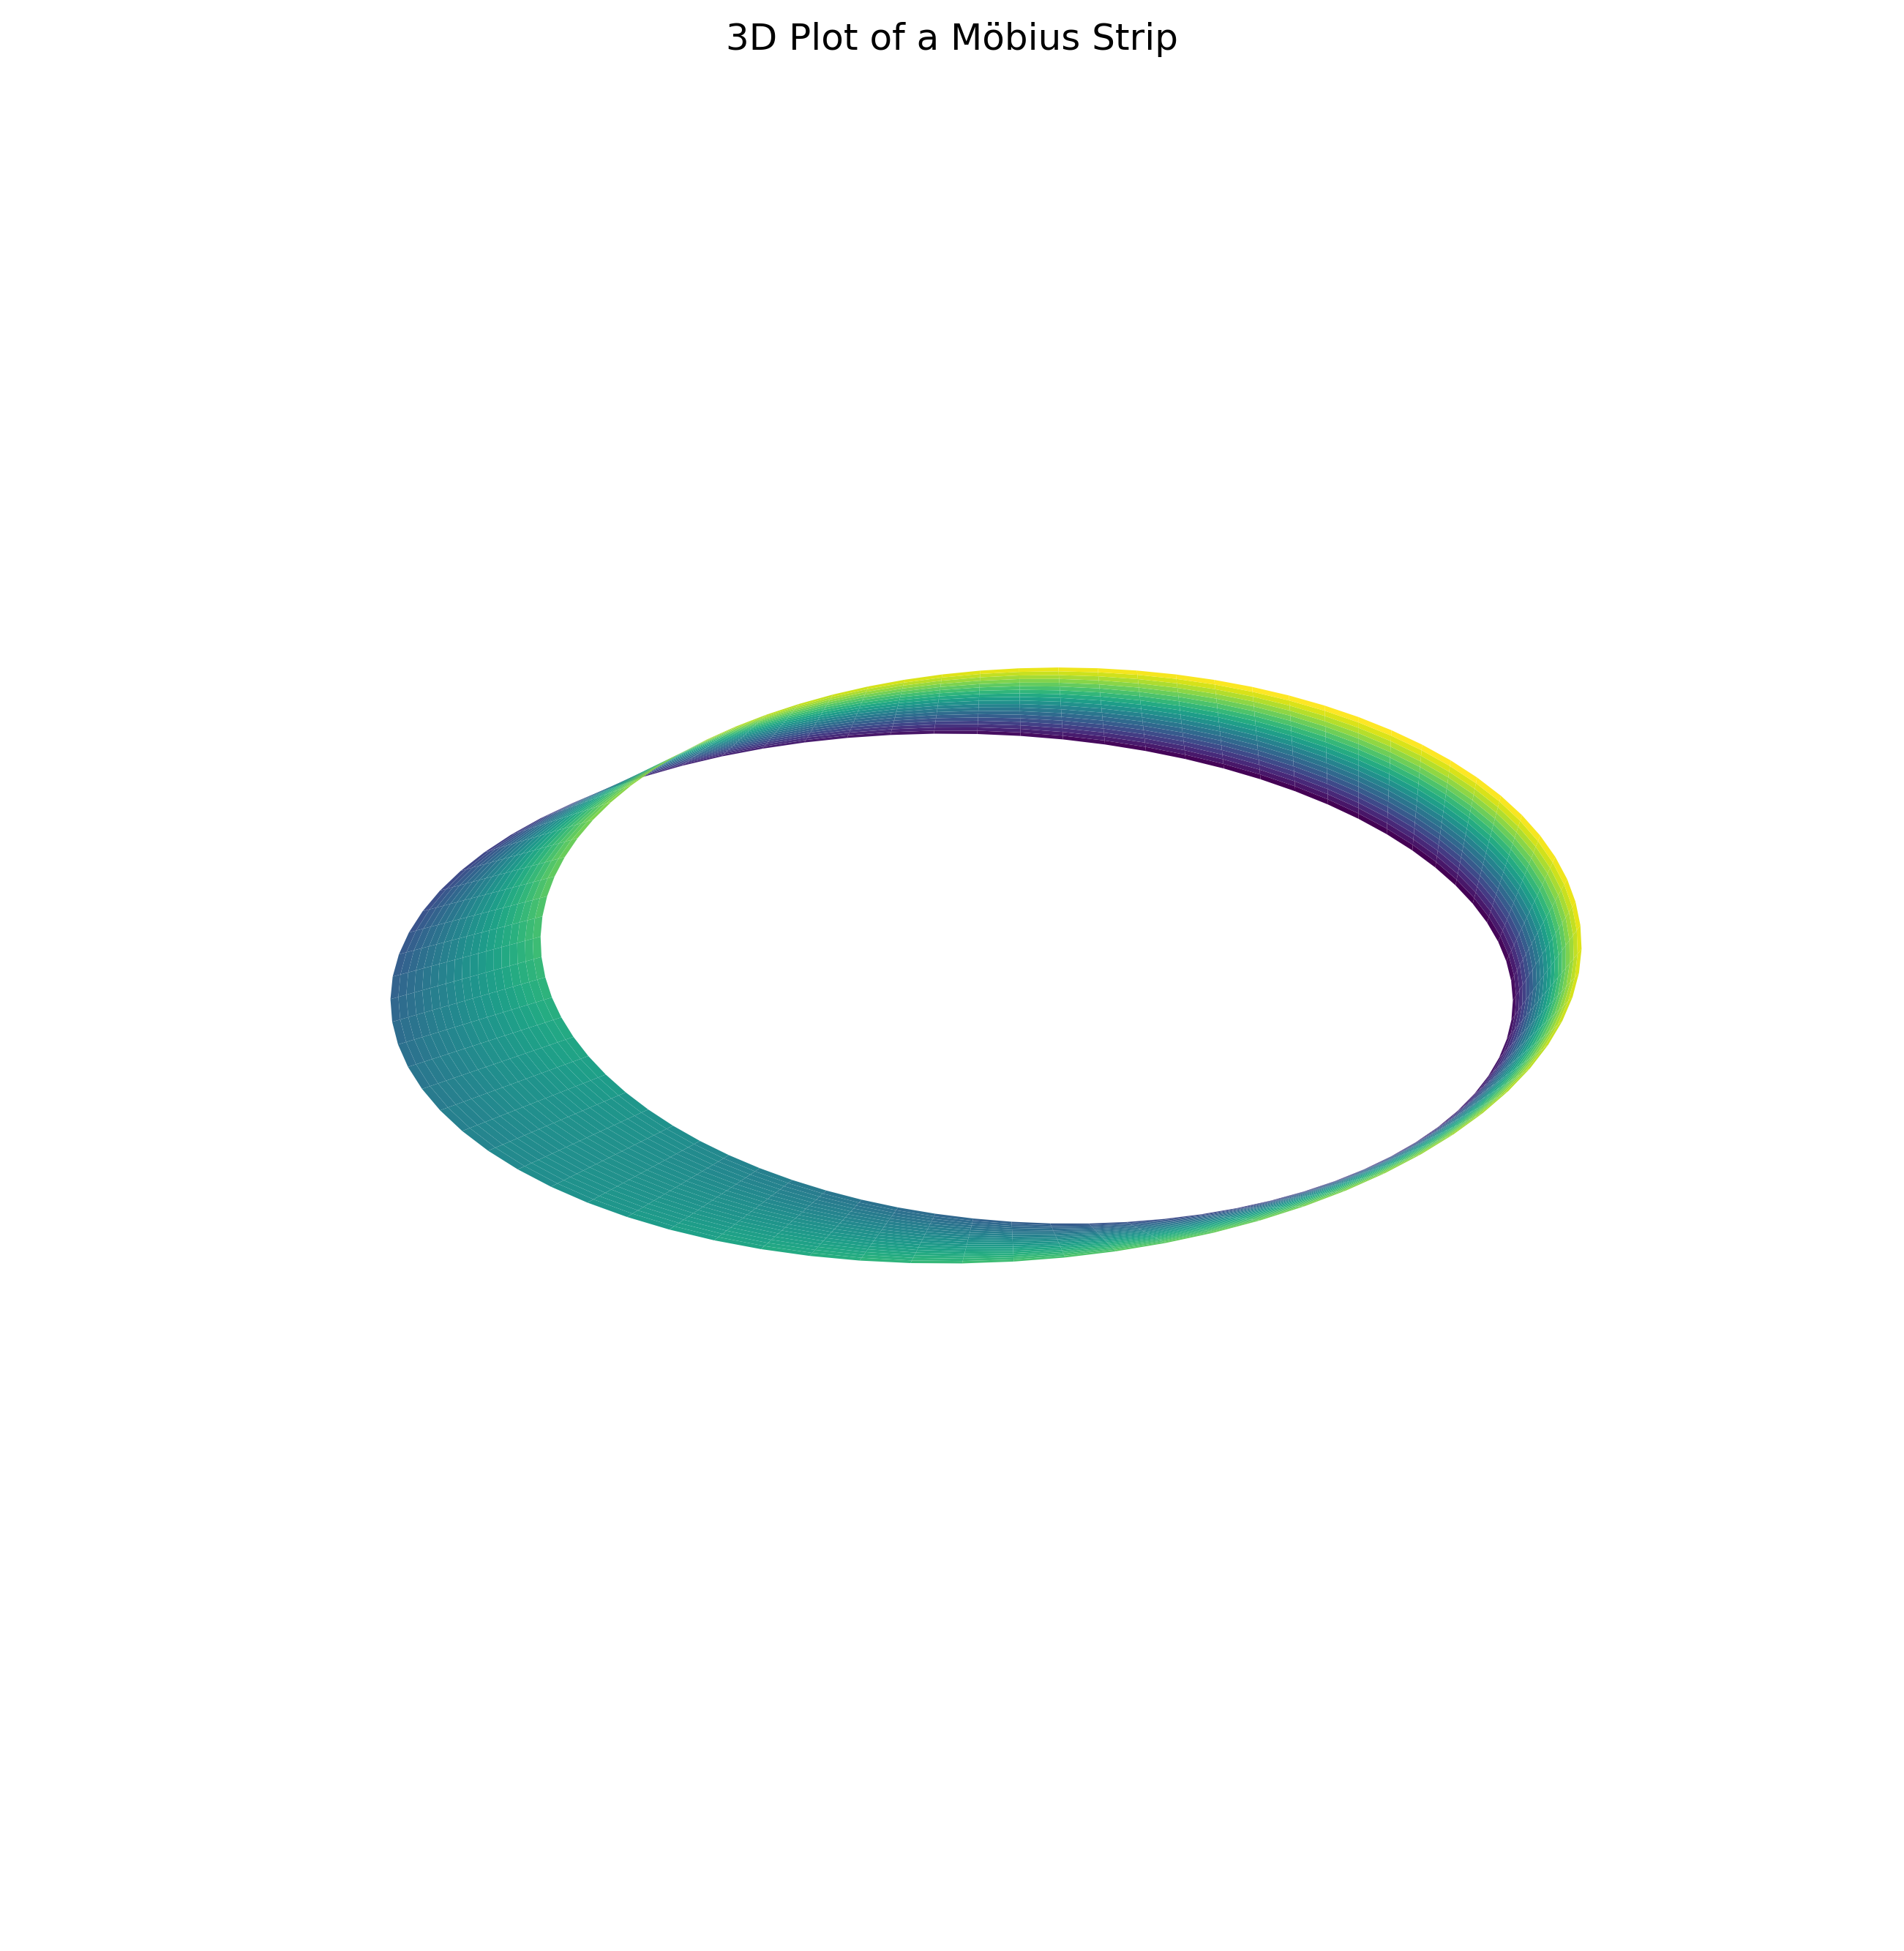


**Step number:** 2 out of 2.
 
**Sub-task:** Plot the 3D Möbius strip using matplotlib.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
- Use matplotlib's plot_surface() function with the computed coordinates to visualize the Möbius strip.
- Apply a colormap to enhance visual distinction of the surface.
- Configure specific viewing parameters such as elevation and azimuth angles (e.g., elev=30, azim=45) to optimally display the Möbius strip's twisted nature.
- Remove axis lines and background grid for a cleaner visualization.
- Set equal aspect ratio to prevent distortion of the geometric shape.
- Display the plot.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.00484,2414,1,2415



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Timing report data saved to: /Users/boris/Desktop/cmbagent_dir/control/time/timing_report_step_2_20250731_154456.json


Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00186560 |          1292 |               101 |         1393 | o3-mini-2025-01-31 |
| engineer response formatter | $0.00676060 |          1690 |              1114 |         2804 | o3-mini-2025-01-31 |
| terminator                  | $0.00483600 |          2414 |                 1 |         2415 | gpt-4.1-2025-04-14 |
| control starter             | $0.00149200 |           742 |                 1 |      

In [4]:
results = cmbagent.planning_and_control_context_carryover(task,
                              max_rounds_control = 30,
                              n_plan_reviews = 1,
                              max_n_attempts = 2,
                              max_plan_steps=2,
                              engineer_model = "gemini-2.5-pro",
                              researcher_model = "gpt-4.1-2025-04-14",
                              plan_reviewer_model = "claude-sonnet-4-20250514", 
                              plan_instructions=r"""
Use engineer for whole analysis. Plan must have 2 steps.
""",
                            work_dir=work_dir,
                            clear_work_dir = True,
                            # restart_at_step = 2, ## restart option available 
                             );

#### Post-Processing Traces

In [5]:
import os
from IPython.display import display, Markdown

def list_dir_tree(startpath, max_depth=5):
    output = ""
    startpath = os.path.expanduser(startpath)
    for root, dirs, files in os.walk(startpath):
        # Limit depth
        depth = root[len(startpath):].count(os.sep)
        if depth > max_depth:
            continue
        indent = "    " * depth
        output += f"{indent}- `{os.path.basename(root)}/`\n"
        for f in files:
            output += f"{indent}    - {f}\n"
    return output

tree_md = list_dir_tree(work_dir)
display(Markdown(f"**Tree view of** `{work_dir}`\n\n{tree_md}"))

**Tree view of** `~/Desktop/cmbagent_dir`

- `cmbagent_dir/`
    - `context/`
        - context_step_1.pkl
        - context_step_0.pkl
        - context_step_2.pkl
    - `planning/`
        - final_plan.json
        - `cost/`
            - cost_report_20250731_154328.json
        - `time/`
            - timing_report_planning_20250731_154328.json
        - `chats/`
            - chat_output_planning.json
    - `control/`
        - `cost/`
            - cost_report_step_1_20250731_154409.json
            - cost_report_step_2_20250731_154456.json
        - `time/`
            - timing_report_step_1_20250731_154409.json
            - timing_report_step_2_20250731_154456.json
        - `codebase/`
            - generate_mobius_strip.py
            - plot_mobius_strip.py
        - `chats/`
            - chat_output_engineer_step_1.json
            - nested_chat_output_engineer_step_1_attempt_1.json
            - chat_history_step_1.json
            - nested_chat_output_engineer_step_2_attempt_1.json
            - chat_output_engineer_step_2.json
            - chat_history_step_2.json
        - `data/`
            - mobius_strip_plot_1_1753973085.png
            - mobius_strip_coordinates.npz
